In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [93]:
bias =100
X,y,coef = make_regression(n_features=1,bias=bias,noise = 10,random_state=42,coef=True)

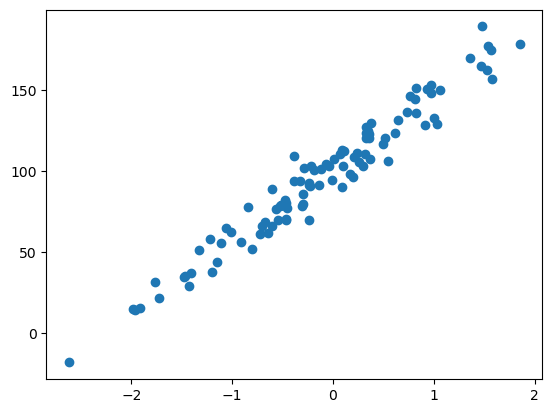

In [94]:
plt.scatter(x = X,y=y)

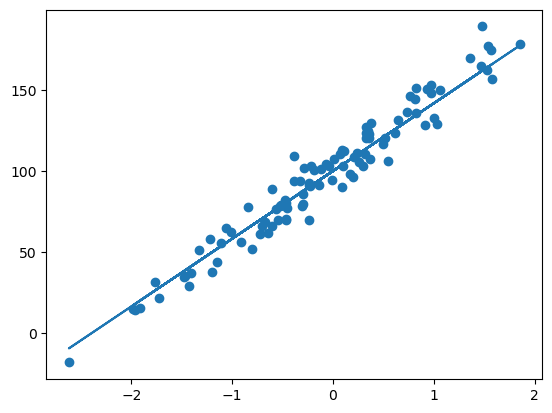

In [95]:
plt.scatter(X,y)
ynew = coef*X+bias
plt.plot(X,ynew)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
model = LinearRegression()

In [106]:
model.fit(X,y)

LinearRegression()

In [107]:
model.coef_,model.intercept_

(array([44.43716999]), 101.165115320527)

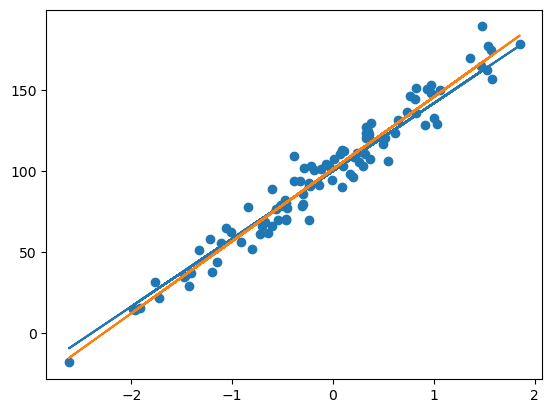

In [99]:
plt.scatter(X,y)
ypred = model.coef_*X + model.intercept_
plt.plot(X,ynew)
plt.plot(X,ypred)

## Custom Linear Regression

In [100]:
class CustomLR:
    def __init__(self,lr=0.1):
        self.lr = lr
    def fit(self,X,y):
        self.X = X
        self.y = y.reshape(-1,1)
        
        self.coef_ = np.random.random()
        self.bias_ = np.random.random()
        
        errors = []
        
        for i in range(50):
            self.gradient_descent()
            errors.append(self.error())
            
    def error(self):
        yh = self.coef_*self.X + self.bias_
        return (yh-self.y)**2
    def gradient_descent(self):
        dcoef,dbias = self.gradient()
        self.coef_ += self.lr*dcoef
        self.bias_ +=self.lr*dbias
        
    def gradient(self):
        yh = self.coef_*self.X + self.bias_
        dcoef = (2*(self.y-yh)*self.X).mean()
        dbias = (2*(self.y - yh)).mean()
        return (dcoef,dbias)
    
    def predict_point(self,X):
        return np.array(self.coef_*X + self.bias_)
    def predict(self,X):
        results = []
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results)
    def score(self,X,y):
        return (self.predict(X) == y).sum()/len(y)

In [101]:
customModel = CustomLR()

In [102]:
customModel.fit(X,y)

In [103]:
customModel.coef_,customModel.bias_

(44.42173157231408, 101.15725572901356)

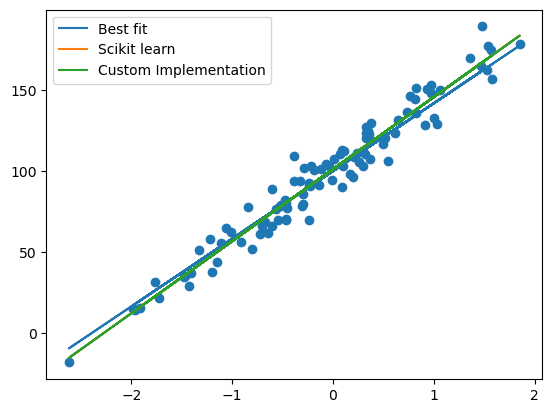

In [104]:
plt.scatter(X,y)
ypred = model.coef_*X + model.intercept_
plt.plot(X,ynew,label="Best fit")
plt.plot(X,model.predict(X),label="Scikit learn")
plt.plot(X,customModel.predict(X),label="Custom Implementation")
plt.legend()

In [105]:
customModel.score(X,y)

0.0